In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# assigns arrays of random floats to variables
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# zip funtion combines the two new arrays into an object in memory
# each lat and lng with the same index in their own array, are paired into a tuple in the new zipped array
# in lat_lngs, the lat is index 0 and lng index 1 in each tuple.  each tuple is a full coordinate
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Assinging the zipped array to a list
# you can only unzip a zipped tuple once before it's removed from memory
coordinates = list(lat_lngs)

In [4]:
#import citipy
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
# Unmodified, This will return an error because there is nothing to indicate location
# will add cities soon
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to track progress.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# enumerate method is a shortcut for referencing by each city's index but returning the city name
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Adds city name to our base URL by creating an endpoint URL with each city. 
    # the .replace removes empty space and concatenates if the city name has a space 
    # otherwise it would find weather data for Cabo instead of Cabo San Lucas
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    # this will run through each city and make an api call based on the city_url created above
    #try except blocks lets the code continue even if an error occurs
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        #general purpose statement to handle all errors eincounter and continue the program
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | filingue
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | miles city
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | haines junction
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | bay roberts
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | saint-francois
Processing Record 19 of Set 1 | jerez
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mataura
P

Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | sebeta
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | ca mau
Processing Record 44 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 45 of Set 4 | coihaique
Processing Record 46 of Set 4 | campechuela
Processing Record 47 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 48 of Set 4 | pangoa
Processing Record 49 of Set 4 | abu zabad
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | ixtapa
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | semey
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | homer
Processing Record 8 of Set 5 | oga
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | redmond
Processing Record 11 of Set 5 | kyshtovka
Processing Record 12 of Set 5 | bathsheba
Pr

Processing Record 29 of Set 8 | nha trang
Processing Record 30 of Set 8 | colomi
Processing Record 31 of Set 8 | apaseo el alto
Processing Record 32 of Set 8 | aksarka
Processing Record 33 of Set 8 | cascais
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | kuche
City not found. Skipping...
Processing Record 37 of Set 8 | yining
Processing Record 38 of Set 8 | kalianget
Processing Record 39 of Set 8 | kitimat
Processing Record 40 of Set 8 | mokhsogollokh
Processing Record 41 of Set 8 | abrau-dyurso
Processing Record 42 of Set 8 | achacachi
Processing Record 43 of Set 8 | biak
Processing Record 44 of Set 8 | anadyr
Processing Record 45 of Set 8 | camacha
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | maldonado
Processing Record 48 of Set 8 | abadan
Processing Record 49 of Set 8 | porto walter
Processing Record 50 of Set 8 | los llanos de aridane
Processing Record 1 of Set 9 | matagami
Processing Rec

Processing Record 20 of Set 12 | karaul
City not found. Skipping...
Processing Record 21 of Set 12 | orbetello
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | storsteinnes
Processing Record 24 of Set 12 | beaune
Processing Record 25 of Set 12 | valleyview
Processing Record 26 of Set 12 | la roda
Processing Record 27 of Set 12 | ilulissat
Processing Record 28 of Set 12 | broome
Processing Record 29 of Set 12 | nouakchott
Processing Record 30 of Set 12 | umba
Processing Record 31 of Set 12 | khorramshahr
Processing Record 32 of Set 12 | chernyshevskiy
Processing Record 33 of Set 12 | boke
Processing Record 34 of Set 12 | archidona
Processing Record 35 of Set 12 | mikhaylovka
Processing Record 36 of Set 12 | gari
Processing Record 37 of Set 12 | vao
Processing Record 38 of Set 12 | mackay
Processing Record 39 of Set 12 | ranong
Processing Record 40 of Set 12 | quelimane
Processing Record 41 of Set 12 | nouadhibou
Processing Record 42 of Set 12 | waipawa
Process

In [10]:
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.00,-57.56,62.60,55,0,8.05,AR,2020-08-28 18:40:40
1,Cabo San Lucas,22.89,-109.91,82.99,69,90,11.41,MX,2020-08-28 18:44:45
2,Arraial Do Cabo,-22.97,-42.03,78.80,69,0,23.04,BR,2020-08-28 18:43:33
3,Filingue,14.35,3.32,87.73,54,98,7.61,NE,2020-08-28 18:44:45
4,Dikson,73.51,80.55,49.57,80,12,10.33,RU,2020-08-28 18:44:45
5,Pisco,-13.70,-76.22,64.99,77,75,8.05,PE,2020-08-28 18:44:45
6,Miles City,46.41,-105.84,69.80,32,1,6.93,US,2020-08-28 18:44:45
7,Esperance,-33.87,121.90,57.20,82,38,19.46,AU,2020-08-28 18:44:45
8,Karratha,-20.74,116.85,77.63,28,0,9.15,AU,2020-08-28 18:44:46
9,Haines Junction,60.75,-137.51,47.34,83,100,3.60,CA,2020-08-28 18:44:46


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2020-08-28 18:40:40,-38.00,-57.56,62.60,55,0,8.05
1,Cabo San Lucas,MX,2020-08-28 18:44:45,22.89,-109.91,82.99,69,90,11.41
2,Arraial Do Cabo,BR,2020-08-28 18:43:33,-22.97,-42.03,78.80,69,0,23.04
3,Filingue,NE,2020-08-28 18:44:45,14.35,3.32,87.73,54,98,7.61
4,Dikson,RU,2020-08-28 18:44:45,73.51,80.55,49.57,80,12,10.33
...,...,...,...,...,...,...,...,...,...
569,Kichera,RU,2020-08-28 18:46:13,55.94,110.10,54.18,84,100,4.16
570,Mezen,RU,2020-08-28 18:46:13,65.85,44.24,42.30,76,0,5.14
571,Ketchikan,US,2020-08-28 18:42:48,55.34,-131.65,57.20,82,75,17.22
572,Ornskoldsvik,SE,2020-08-28 18:46:14,63.29,18.72,53.60,71,100,4.70


In [14]:
#added a new folder called weather_data
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Switching gears to plotting the data now

In [16]:
# Extract relevant fields from the DataFrame for plotting.
# indicate the relevent data column
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

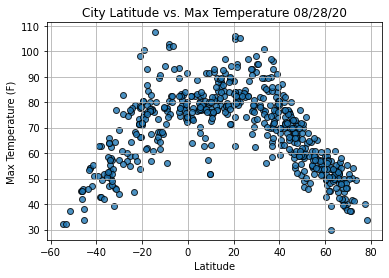

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

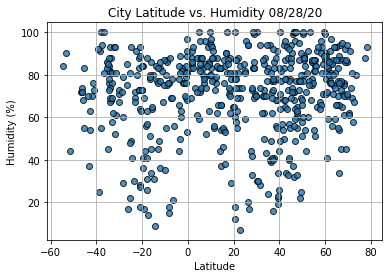

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

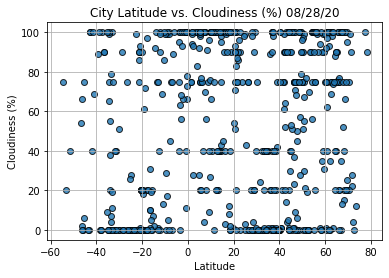

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

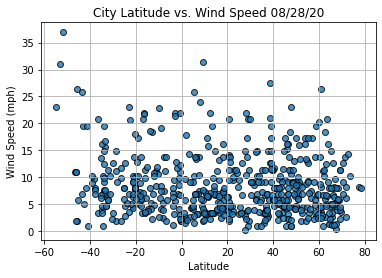

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #Add title
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
# If we run this code there will be no output until we call the function with five parameters. Which we will adjust for
# each scatter plot we want to create

In [24]:
# getting a dataframe for each hemisphere to perform regressions on later
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

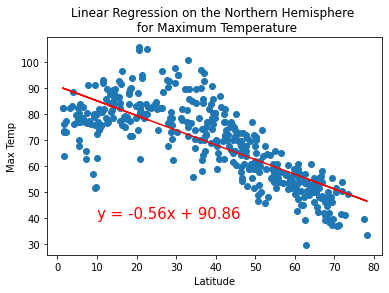

In [25]:
# Linear regression on the Northern Hemisphere
# using north hemi lats and temps as values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

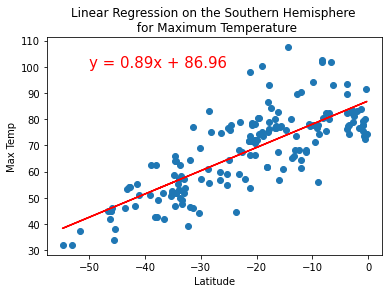

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,100))

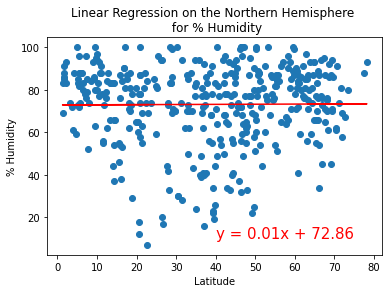

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

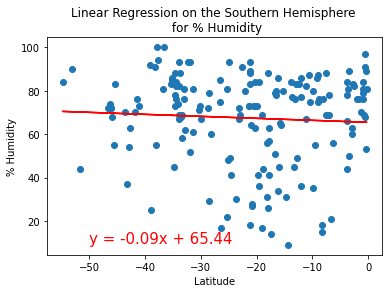

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

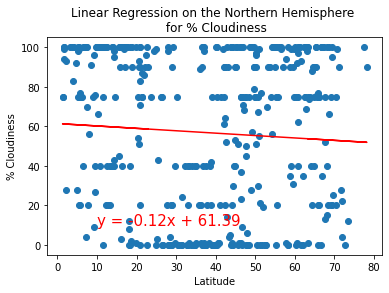

In [35]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,10))

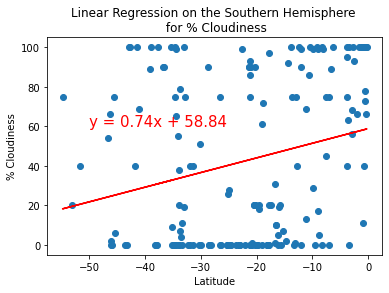

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

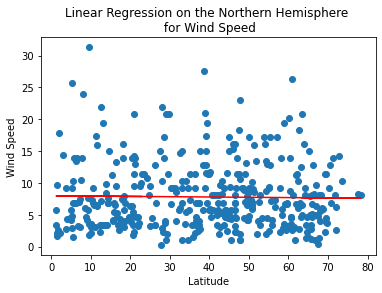

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

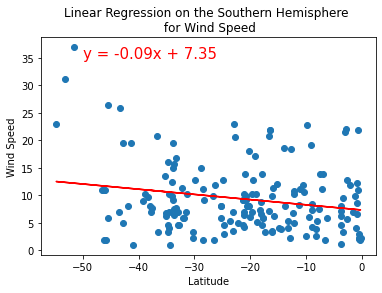

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))